# Support Vector Machine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import random
%matplotlib inline

In [2]:
random_seed = 100
random.seed(random_seed)
np.random.seed(random_seed)

df = pd.read_csv("../dataset/aps_failure_training_set.csv")
df_test = pd.read_csv("../dataset/aps_failure_test_set.csv")

In [3]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
df = df.rename(columns = {'class' : 'Flag'})
df['Flag'] = df.Flag.map({'neg':0, 'pos':1})
df = df.replace(['na'],[np.NaN])

In [5]:
df.isnull().any().head(25)

Flag      False
aa_000    False
ab_000     True
ac_000     True
ad_000     True
ae_000     True
af_000     True
ag_000     True
ag_001     True
ag_002     True
ag_003     True
ag_004     True
ag_005     True
ag_006     True
ag_007     True
ag_008     True
ag_009     True
ah_000     True
ai_000     True
aj_000     True
ak_000     True
al_000     True
am_0       True
an_000     True
ao_000     True
dtype: bool

Text(0,0.5,'Frecuencia')

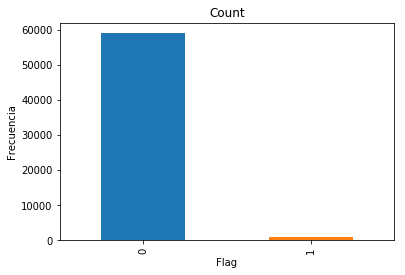

In [6]:
Count = pd.value_counts(df['Flag'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Count")
plt.xlabel("Flag")
plt.ylabel("Frecuencia")

#### La data esta muy imbalanceada, se aplicara PCA para mejorar el performance del os modelos. Los valores faltantes se completaran con la media.

In [7]:
df_X = df.loc[:,df.columns != 'Flag']
df_Y = df.loc[:,df.columns == 'Flag']

df_X = df_X.apply(pd.to_numeric)

df_X= df_X.fillna(df_X.mean()).dropna(axis =1 , how ='all')

scaler = StandardScaler()

scaler.fit(df_X)

df_X = scaler.transform(df_X)

pca = PCA(0.95)

pca.fit(df_X)

#Numero de componentes se redujo
pca.n_components_

82

In [8]:
df_X = pca.transform(df_X)

df_X= pd.DataFrame(df_X)

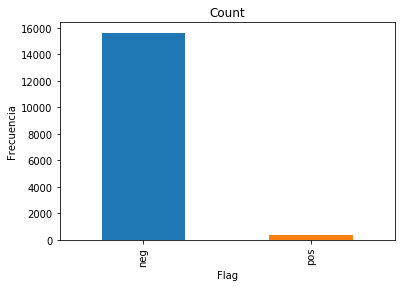

In [9]:
df_test = df_test.rename(columns = {'class' : 'Flag'})
df_test = df_test.replace(['na'],[np.NaN])

Count = pd.value_counts(df_test['Flag'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Count")
plt.xlabel("Flag")
plt.ylabel("Frecuencia")

df_test['Flag'] = df_test.Flag.map({'neg':0, 'pos':1})

df_test_X = df_test.loc[:,df_test.columns != 'Flag']
df_test_Y = df_test.loc[:,df_test.columns == 'Flag']

df_test_X = df_test_X.apply(pd.to_numeric)

df_test_X= df_test_X.fillna(df_test_X.mean()).dropna(axis =1 , how ='all')

scaler = StandardScaler()

scaler.fit(df_test_X)

df_test_X = scaler.transform(df_test_X)

pca = PCA(82)

pca.fit(df_test_X)

pca.n_components_

df_test_X = pca.transform(df_test_X)

df_test_X= pd.DataFrame(df_test_X)

In [10]:
X_train,X_validation,Y_train,Y_validation = train_test_split(df_X,df_Y,test_size = 0.2,random_state = 0)
DF = pd.concat([X_train,Y_train],axis = 1)

### Se aplicara undersampling para balancear los datos

In [11]:
numberofrecords_pos = len(DF[DF.Flag == 1])
pos_indices = np.array(DF[DF.Flag == 1].index)

neg_indices = DF[DF.Flag == 0].index

random_neg_indices = np.random.choice(neg_indices, numberofrecords_pos, replace = False)
random_neg_indices =np.array(random_neg_indices)

under_sample_indices = np.concatenate([pos_indices,random_neg_indices])

under_sample_data = DF.loc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:,under_sample_data.columns != 'Flag']
Y_undersample = under_sample_data.loc[:,under_sample_data.columns == 'Flag']

print("Porcentaje Neg: " , len(under_sample_data[under_sample_data.Flag == 0])/len(under_sample_data))
print("Porcentaje Pos : ", len(under_sample_data[under_sample_data.Flag == 1])/len(under_sample_data))
print("Datapoints : ", len(under_sample_data))

Porcentaje Neg:  0.5
Porcentaje Pos :  0.5
Datapoints :  1632


# SVM

In [12]:
model = SVC(kernel='linear', C=40)
model.fit(X_undersample, Y_undersample)

/Users/paulcristianperccajulca/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=40, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
score = model.score(X_undersample, Y_undersample)
tasa_de_error = (1- score)
n_ejemplos = len(df_X)
n_aciertos = n_ejemplos * (1 - tasa_de_error) ## COMPLETAR...
n_errores  = n_ejemplos * tasa_de_error ## COMPLETAR...

print ('Total de ejemplos: %d' % n_ejemplos)
print ('Exactitud: %0.4f' % score)
print ('Tasa de error: %0.4f' % tasa_de_error)
print ('Número de ejemplos correctamente clasificados: %d' % n_aciertos)
print ('Número de ejemplos incorrectamente clasificados: %d' % n_errores)


Total de ejemplos: 60000
Exactitud: 0.9645
Tasa de error: 0.0355
Número de ejemplos correctamente clasificados: 57867
Número de ejemplos incorrectamente clasificados: 2132


In [14]:
y_pred = model.predict(df_test_X)

In [15]:
confusion_matrix(df_test_Y,y_pred)

array([[10760,  4865],
       [  187,   188]])

In [4]:
### Con este resultado tenemos 187 FNs y 4865 FPs. El costo total del modelo sera :

In [7]:
resultado = (187*500) + (4865*10)
print( 'El costo total del modelo será: %d ' % resultado)

El costo total del modelo será: 142150 
